In [3]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline

In [4]:
heart_df=pd.read_csv(r"C:\Users\panka\Downloads\framingham.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\panka\\Downloads\\framingham.csv'

In [ ]:
heart_df

In [ ]:
heart_df.shape

In [7]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [9]:
heart_df.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
heart_df.nunique()/heart_df.shape[0]

male               0.000472
age                0.009202
education          0.000944
currentSmoker      0.000472
cigsPerDay         0.007787
BPMeds             0.000472
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058518
sysBP              0.055215
diaBP              0.034450
BMI                0.321614
heartRate          0.017225
glucose            0.033742
TenYearCHD         0.000472
dtype: float64

In [11]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Data cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [13]:
## Replacing null values with the mean value
heart_df["education"].fillna(heart_df["education"].mean(),inplace=True)
heart_df["cigsPerDay"].fillna(heart_df["cigsPerDay"].mean(),inplace=True)
heart_df["BPMeds"].fillna(heart_df["BPMeds"].mean(),inplace=True)
heart_df["totChol"].fillna(heart_df["totChol"].mean(),inplace=True)
heart_df["BMI"].fillna(heart_df["BMI"].mean(),inplace=True)
heart_df["heartRate"].fillna(heart_df["heartRate"].mean(),inplace=True)
heart_df["glucose"].fillna(heart_df["glucose"].mean(),inplace=True)


In [14]:
## Rechecking for null values
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
## CHD value counts
heart_df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

# DATA VISUALIZATION

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

<AxesSubplot:title={'center':'Distribution of Heart Disease'}, ylabel='TenYearCHD'>

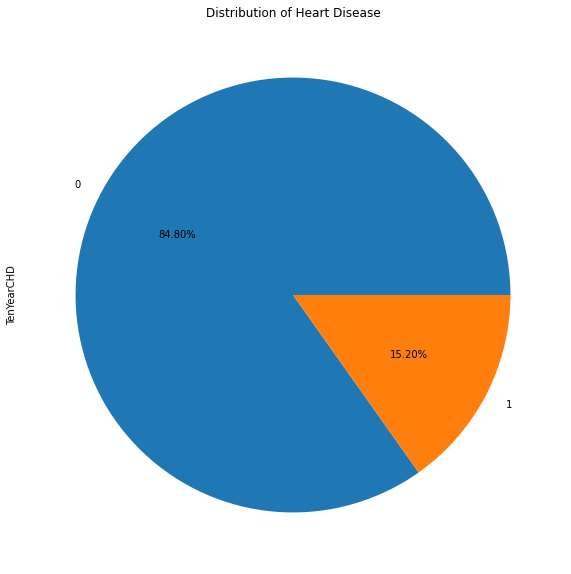

In [16]:
## Distribution of heart diseases
plt.figure(figsize=(10,10))
plt.title("Distribution of Heart Disease")
heart_df["TenYearCHD"].value_counts().plot(kind="pie",autopct='%1.2f%%')

The above pie chart indicates that 15.20% of the population is suffering from the heart diseases whereas 84.80% population is healthy.

<AxesSubplot:title={'center':'Male Distribution'}, ylabel='male'>

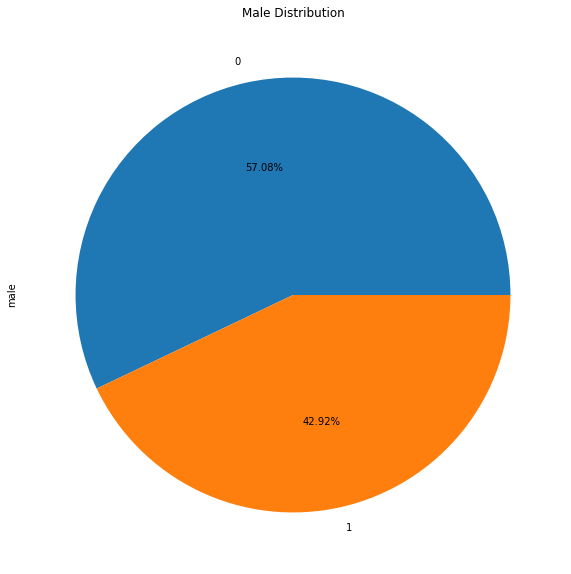

In [19]:
## Male population distribution
plt.figure(figsize=(10,10))
plt.title("Male Distribution")
heart_df["male"].value_counts().plot(kind="pie",autopct='%1.2f%%')

<AxesSubplot:title={'center':'Smoker Distribution'}, ylabel='currentSmoker'>

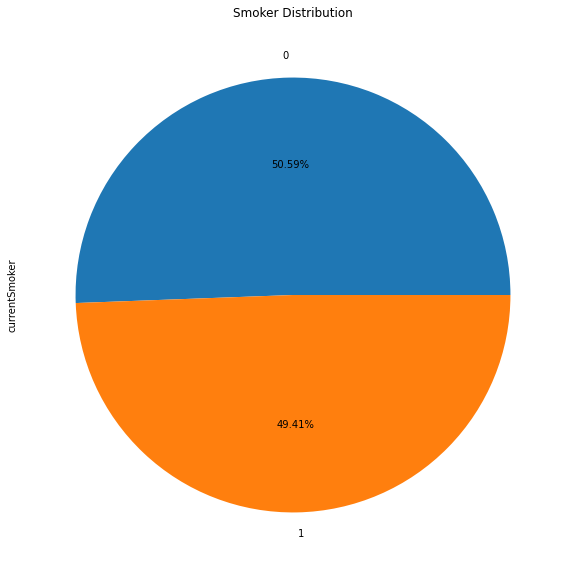

In [18]:
## Currently Smokers distribution
plt.figure(figsize=(10,10))
plt.title("Smoker Distribution")
heart_df["currentSmoker"].value_counts().plot(kind="pie",autopct='%1.2f%%')


<AxesSubplot:title={'center':'Diabetes Distribution'}, ylabel='diabetes'>

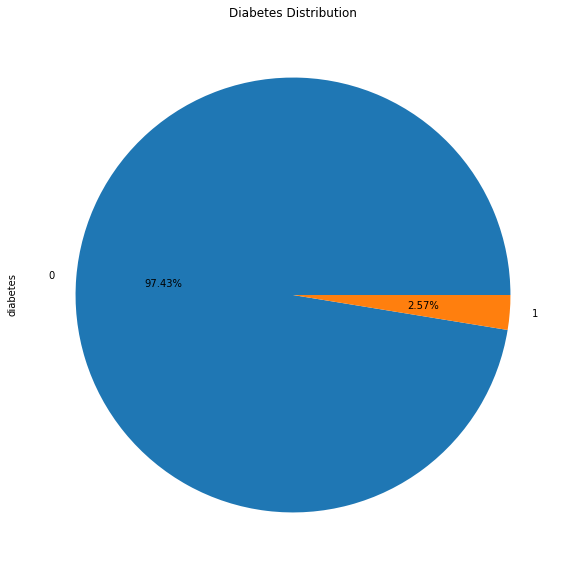

In [20]:
## Diabetes distribution
plt.figure(figsize=(10,10))
plt.title("Diabetes Distribution")
heart_df["diabetes"].value_counts().plot(kind="pie",autopct='%1.2f%%')

Text(0.5, 1.0, 'Hypertension impact on Heart Disase')

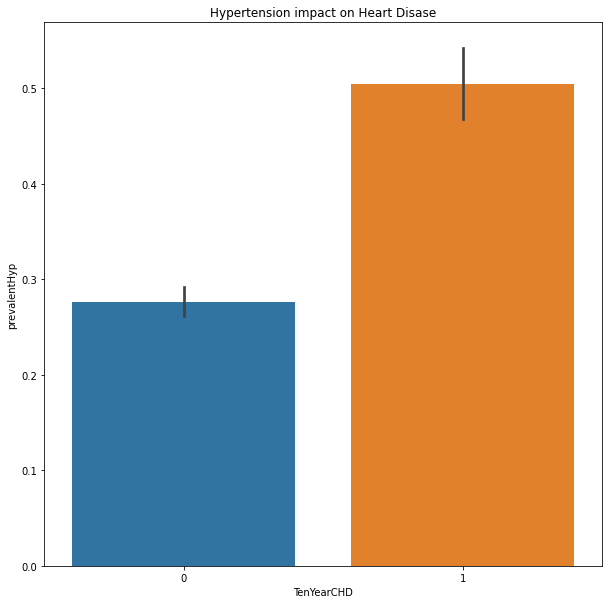

In [21]:
## bar plot to plot hypertension impact on heart disease
plt.figure(figsize=(10,10))
sns.barplot(x="TenYearCHD",y="prevalentHyp",data=heart_df)

plt.title("Hypertension impact on Heart Disase")

According to the plot, population suffering from Hypertension have higher chances of having Heart Diseases.

Text(0.5, 1.0, 'Cholestrol impact on Heart Rate for male')

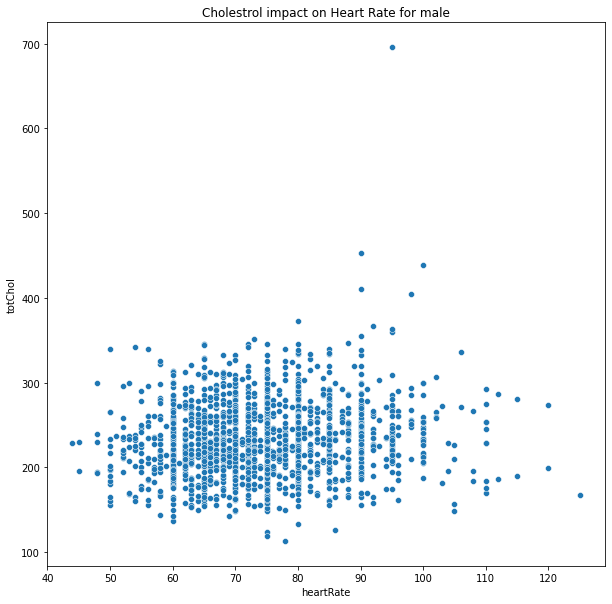

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(y = 'totChol', x = 'heartRate',data=heart_df[heart_df.male==1])
plt.title("Cholestrol impact on Heart Rate for male")

According to the plot, the heart rate of the male population keeps on increasing, irrespective of the Cholestrol level.